I'm going to use this notebook to generate and collect data for the "metallic contats" to carbon nanotubes chapter of my thesis.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#first up... finding the dates all of my devices were created.

import os, time
from datetime import datetime

data_dir = '/Users/nik/Dropbox/Samples/'
ignore = ['general', 'BiSe', 'mask_aligner_project', 'mar_2013_tyrell', 'inkscape test', 'mcqueen_samples', 'pdwire']

# look for all *.ai
devices = []
for dirpath, subdirs, files in os.walk(data_dir):
    for f in files:
        if f.endswith('.ai'):
            if not np.any([ig in dirpath for ig in ignore]):
                devices.append(os.path.join(dirpath, f))
devices.sort(key=lambda n: os.path.getmtime(n))

dates = []
for d in devices:
    #date = time.localtime(os.path.getmtime(d))
    date = datetime.fromtimestamp(os.path.getmtime(d))
    dates.append(date)
    print '{0} -- {1}'.format(d[27:], datetime.strftime(date, '%m/%d/%Y'))

072810_3/072810_3.ai -- 09/13/2011
072810_1/072810_1.ai -- 09/13/2011
110409/110409_1.ai -- 09/13/2011
110409/110409_4.ai -- 09/13/2011
MF7/Illustrator/MF7_q4.ai -- 09/13/2011
MF7/Illustrator/MF7_q1.ai -- 09/13/2011
RTQD1/Illustrator/RTQD1_q2.ai -- 09/13/2011
RTQD1/Illustrator/RTQD1_q1.ai -- 09/13/2011
RTQD1/Illustrator/RTQD1_q3.ai -- 09/13/2011
RTQD1/Illustrator/RTQD1_q4.ai -- 09/13/2011
MF3/Illustrator/MF3b.ai -- 10/17/2011
MF6/Illustrator/MF6_q3.ai -- 10/17/2011
MF6/Illustrator/MF6_q4.ai -- 10/17/2011
MF3/Illustrator/MF3c.ai -- 11/02/2011
MF3/Illustrator/MF3d.ai -- 11/02/2011
MF6/Illustrator/MF6_q1.ai -- 11/02/2011
MF6/Illustrator/MF6_q2.ai -- 11/02/2011
MF7/Illustrator/MF7_q2.ai -- 11/02/2011
MF7/Illustrator/MF7_q3.ai -- 11/02/2011
MF13/Illustrator/MF13_q3.ai -- 11/17/2011
MF12/Illustrator/MF12_q1.ai -- 11/17/2011
MT2/Illustrator/MT2_q2.ai -- 12/01/2011
MT1/Illustrator/MT1_q4.ai -- 12/01/2011
MF10/Illustrator/MF10_q1.ai -- 12/07/2011
MF8/Illustrator/MF8q1.ai -- 12/12/2011
MF8/Illus

In [3]:
# s = 'scfm19'

# for d in devices:
#     if s.lower() in d.lower():
#         print '{0} -- {1}'.format(d[27:], 
#                                   time.strftime('%m/%d/%Y', 
#                                                 time.localtime(os.path.getmtime(d))))

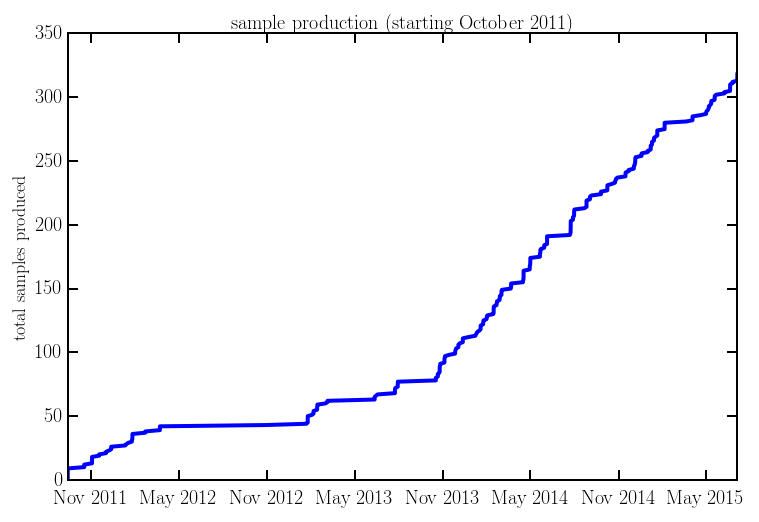

In [4]:
number = range(len(dates)) #number of devices created by that index in dates

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(dates, number)
ax.set_ylabel('total samples produced')
ax.set_title('sample production (starting October 2011)')
fig.savefig('sample_production.png')

# SAMPLE BRACKET ANALYSIS

Alright, let's load this sample bracket document

In [686]:
import pandas as pd

fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/chapter4'

Of the 193, let's see how many had some measured nanotube resistance...

In [687]:
def format_resistances(a):
    """a -- an array of resistances including x's meaning too large to measure.
    
        return a numpy array of resistances with np.inf in place of the x that makes sense """
    rs = []
    try:
        if np.isnan(a):
            return np.array(rs)
    except:
        a = str(a)
        for r in a.split(','):
            r = r.strip()
            if r == 'x':
                rs.append(1e9)
            elif (r=='') or (r=='None'):
                continue
            else:
                rs.append(float(r)*1000.0)
        return np.array(rs)

In [688]:
def yield_resistances(s):
    for array in s:
        for resistance in array:
            yield resistance
            
# a = np.fromiter(yield_resistances(df['FM-CNT']), dtype=np.float)

In [689]:
def format_materials(matseries):
    matarray = []
    methodarray = []
    for mat in matseries:
        try:
            if np.isnan(mat):
                mat = 'Unknown'
        except:
            pass
        mat = mat.split(',')
        if len(mat)>1:
            pass
        else:
            mat.append('Unknown')
        mat = [str(m).strip() for m in mat] 
        matarray.append(mat[0])
        methodarray.append(mat[1])
    return matarray, methodarray

In [690]:
# use those two function to import the spreadsheet data

data_dir = '/Users/nik/Dropbox/Documents/nanotube samples/'
df = pd.read_excel(os.path.join(data_dir, 'samples_info.xlsx'), convert_float=False)
for col in df:
    if '-CNT' in col:
        df[col] = df[col].apply(format_resistances)
    if ' Material' in col:
        df[col], df[col[0:2]+' Method'] = format_materials(df[col])
df['Developer'] = df['Developer'].astype(str)

fm = np.fromiter(yield_resistances(df['FM-CNT']), dtype=np.float)
sc = np.fromiter(yield_resistances(df['SC-CNT']), dtype=np.float)
sf = np.fromiter(yield_resistances(df['SC-CNT-FM']), dtype=np.float)
nm = np.fromiter(yield_resistances(df['NM-CNT']), dtype=np.float)

resistances = [nm, fm, sc, sf]

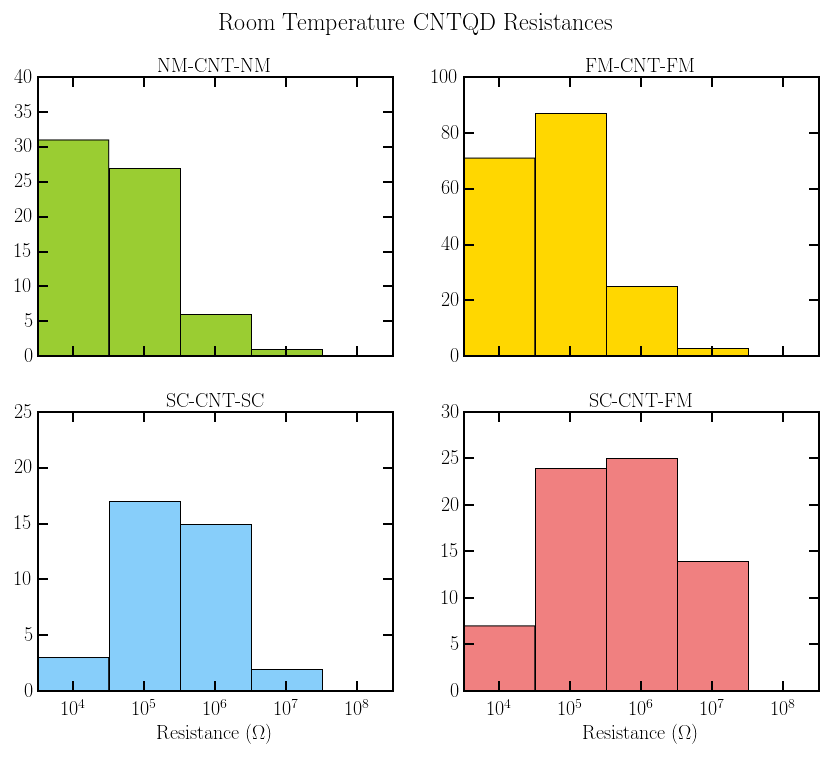

In [702]:
# working contacts only

bins = np.array([4, 5, 6, 7, 8])
labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

fig, axs = plt.subplots(2, 2, figsize = (14,11), sharey=False, sharex=True)
ax = axs.flatten()

for i, axis in enumerate(ax):
    axis.hist(np.log10(resistances[i]), log=False, 
              bins=bins, color = colors[i])

ax[0].set_title('NM-CNT-NM')
ax[1].set_title('FM-CNT-FM')
ax[2].set_title('SC-CNT-SC')
ax[3].set_title('SC-CNT-FM')

ax[2].set_xlim(4,9)
ax[2].set_xticks(bins+0.5)
ax[2].set_xticklabels(labels)
ax[2].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
ax[3].set_xlim(4,9)
ax[3].set_xticks(bins+0.5)
ax[3].set_xticklabels(labels)
ax[3].set_xlabel('Resistance ($\Omega$)', fontsize = 20)

ax[0].set_ylim(0,40)
ax[1].set_ylim(0,100)
ax[2].set_ylim(0,25)
ax[3].set_ylim(0,30)

fig.suptitle('Room Temperature CNTQD Resistances', fontsize = 24)
fig.savefig(os.path.join(fig_dir, 'room_temp_cntqd_resistances.png'), dpi=300)

In [692]:
def pie_data(resistance):
    working = np.sum(resistance<1e9)
    length = len(resistance)
    dead = length-working
    data = np.array([working, dead], dtype=float)
    labels = ['{0:.0f} ({1:.1f}\%)'.format(l, l/length*100.0) for l in data]
    return data, labels

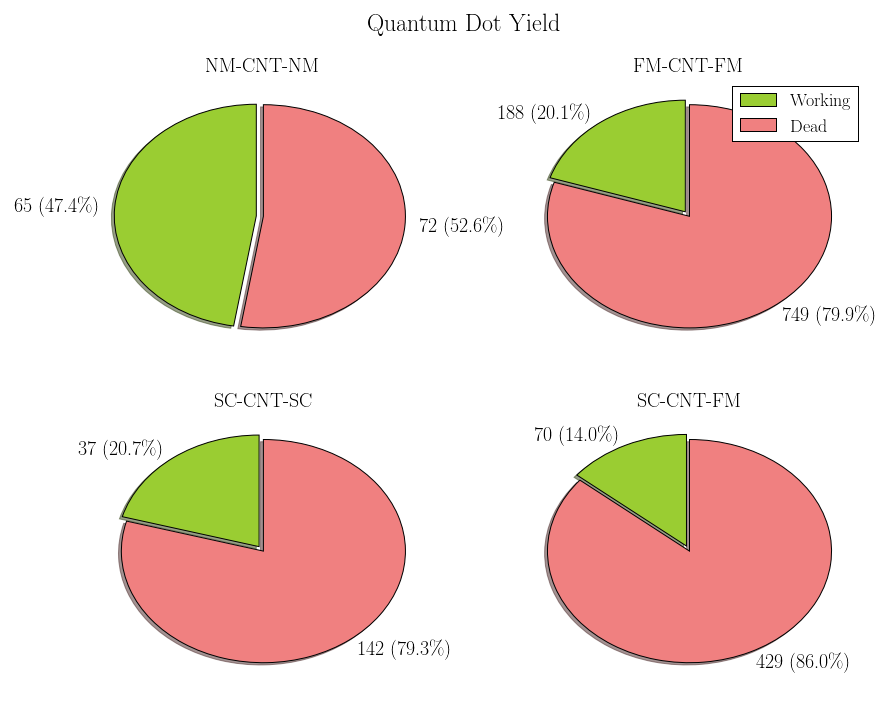

In [693]:
explode=(0.05, 0)
colors = ['yellowgreen', 'lightcoral']
leg_labels = ['Working', 'Dead']

fig, axs = plt.subplots(2, 2, figsize = (14,11), sharey=True, sharex=True)
ax = axs.flatten()

for i, axis in enumerate(ax):    
    fracs, labels = pie_data(resistances[i])
    axis.pie(fracs, shadow=True, startangle=90, explode=explode, 
             labels = labels, colors = colors)
    if i==1:
        axis.legend(patches, leg_labels, loc="best")
ax[0].set_title('NM-CNT-NM')
ax[1].set_title('FM-CNT-FM')
ax[2].set_title('SC-CNT-SC')
ax[3].set_title('SC-CNT-FM')

fig.suptitle('Quantum Dot Yield', fontsize = 24)
fig.savefig(os.path.join(fig_dir, 'quantum_dot_yield.png'), dpi=300)

In [694]:
mat_dict = {'Co':'FM', 'Py':'FM', 'Al':'SC', 'Nb':'SC', 'Au':'NM', 'Pd':'NM'}
materials = ['Co', 'Py', 'Al', 'Nb', 'Au', 'Pd']
methods = ['thermal', 'ebeam', 'sputter']

material = 'Pd'
method = 'sputter'
mat_type = mat_dict.get(material)

nf = df[df[mat_type+' Material'].str.contains(material)]
nf = nf[nf[mat_type+' Method'] == method]
R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)

if len(R)>0:
#     bins = np.array([4, 5, 6, 7, 8, 9])
#     labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
#     fig, ax = plt.subplots()
#     ax.hist(np.log10(R), log=False, bins=bins)
#     ax.set_xlim(4,9)
#     ax.set_xticks(bins+0.5)
#     ax.set_xticklabels(labels)
#     ax.set_xlabel('Resistance ($\Omega$)', fontsize = 20)
    fracs, labels = pie_data(R)
    print labels

['38 (56.7\\%)', '29 (43.3\\%)']


In [695]:
mat_dict = {'Co':'FM', 'Py':'FM', 'Al':'SC', 'Nb':'SC', 'Au':'NM', 'Pd':'NM'}
materials = ['Co', 'Py', 'Al', 'Nb', 'Au', 'Pd']
methods = ['thermal', 'ebeam', 'sputter']

for material in materials:
    for method in methods:
        mat_type = mat_dict.get(material)

        nf = df[df[mat_type+' Material'].str.contains(material)]
        nf = nf[nf[mat_type+' Method'] == method]
        R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)

        if len(R)>0:
        #     bins = np.array([4, 5, 6, 7, 8, 9])
        #     labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
        #     fig, ax = plt.subplots()
        #     ax.hist(np.log10(R), log=False, bins=bins)
        #     ax.set_xlim(4,9)
        #     ax.set_xticks(bins+0.5)
        #     ax.set_xticklabels(labels)
        #     ax.set_xlabel('Resistance ($\Omega$)', fontsize = 20)
            fracs, labels = pie_data(R)
            print material, method, labels

Co thermal ['77 (19.6\\%)', '315 (80.4\\%)']
Co ebeam ['37 (33.9\\%)', '72 (66.1\\%)']
Co sputter ['55 (24.7\\%)', '168 (75.3\\%)']
Py thermal ['6 (54.5\\%)', '5 (45.5\\%)']
Py sputter ['3 (13.0\\%)', '20 (87.0\\%)']
Al thermal ['32 (19.2\\%)', '135 (80.8\\%)']
Nb sputter ['5 (62.5\\%)', '3 (37.5\\%)']
Au thermal ['27 (48.2\\%)', '29 (51.8\\%)']
Pd sputter ['38 (56.7\\%)', '29 (43.3\\%)']


In [696]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

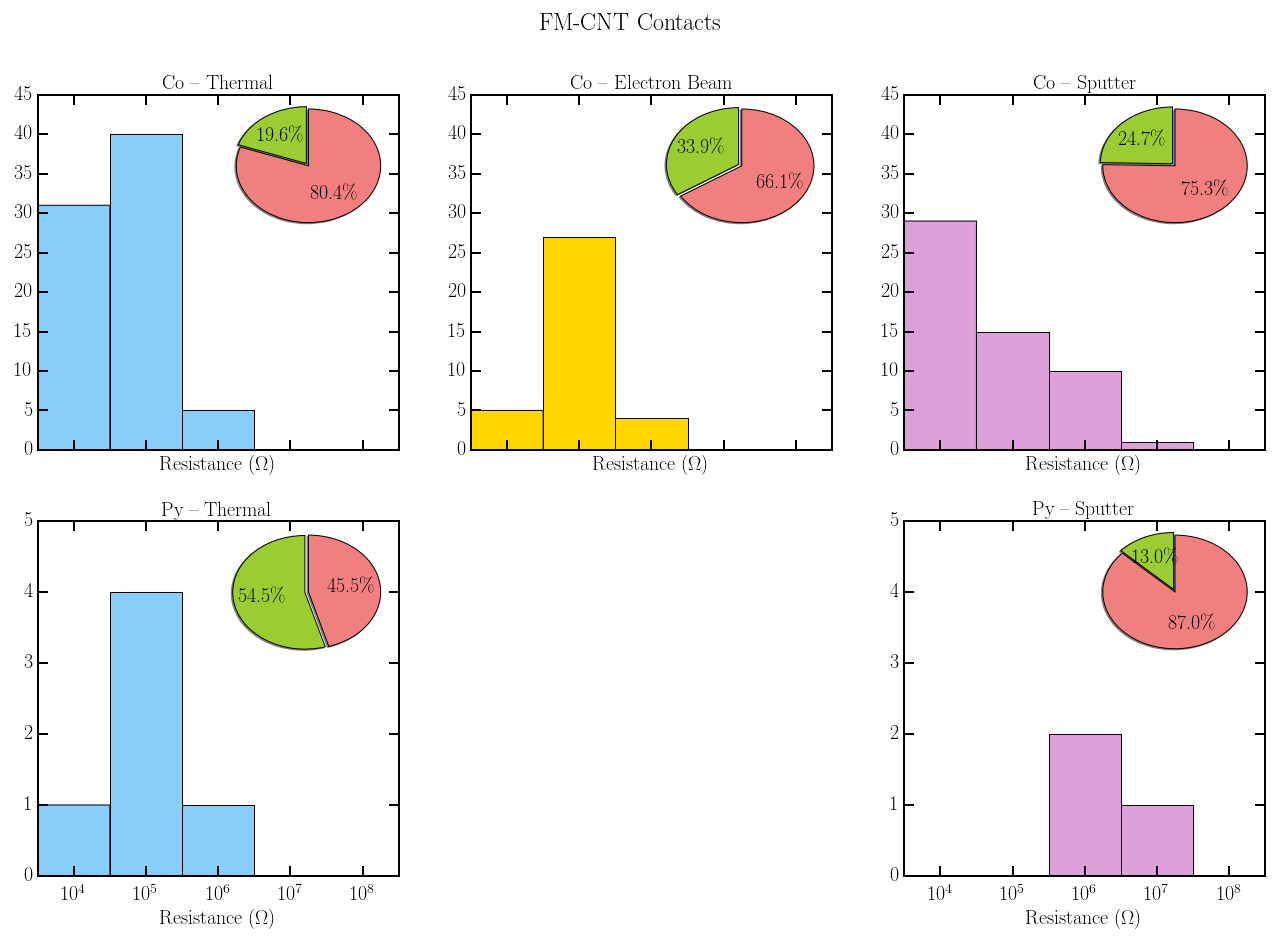

In [697]:
# FM Plots

mat_dict = {'Co':'FM', 'Py':'FM', 'Al':'SC', 'Nb':'SC', 'Au':'NM', 'Pd':'NM'}
materials = ['Co', 'Py']
methods = ['thermal', 'ebeam', 'sputter']
colors = ['lightskyblue', 'gold', 'plum']

fig, axs = plt.subplots(2,3, figsize = (22,14), sharey=False, sharex=True)
ax = axs.flatten()

ind = [0,1,2]
titles = ['Co -- Thermal', 'Co -- Electron Beam', 'Co -- Sputter']
for n, method in enumerate(methods):
    material = 'Co'
    mat_type = mat_dict.get(material)

    nf = df[df[mat_type+' Material'].str.contains(material)]
    nf = nf[nf[mat_type+' Method'] == method]
    R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
    i = ind[n]
    if len(R)>0:
        bins = np.array([4, 5, 6, 7, 8])
        labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
        ax[i].hist(np.log10(R), log=False, bins=bins, color=colors[n])
        ax[i].set_xlim(4,9)
        ax[i].set_xticks(bins+0.5)
        ax[i].set_xticklabels(labels)
        ax[i].set_ylim(0,45)
        ax[i].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
        ax[i].set_title(titles[i])
        
        axin = add_subplot_axes(ax[i],[0.5,0.6,0.5,0.4])
        fracs, labels = pie_data(R)
        total = sum(fracs)
        axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
                 colors = ['yellowgreen', 'lightcoral'], 
                 autopct=lambda(p): '{:.1f}\%'.format(p))
    else:
        pass
        
ind = [3,4,5]
titles = ['Py -- Thermal', 'Py -- Electron Beam', 'Py -- Sputter']
for n, method in enumerate(methods):
    material = 'Py'
    mat_type = mat_dict.get(material)

    nf = df[df[mat_type+' Material'].str.contains(material)]
    nf = nf[nf[mat_type+' Method'] == method]
    R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
    i = ind[n]
    if len(R)>0:
        bins = np.array([4, 5, 6, 7, 8])
        labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
        ax[i].hist(np.log10(R), log=False, bins=bins, color=colors[n])
        ax[i].set_xlim(4,9)
        ax[i].set_xticks(bins+0.5)
        ax[i].set_xticklabels(labels)
        ax[i].set_ylim(0,5)
        ax[i].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
        ax[i].set_title(titles[n])
        
        axin = add_subplot_axes(ax[i],[0.5,0.6,0.5,0.4])
        fracs, labels = pie_data(R)
        total = sum(fracs)
        axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
                 colors = ['yellowgreen', 'lightcoral'], 
                 autopct=lambda(p): '{:.1f}\%'.format(p))
    else:
        ax[i].axis('off')
    
fig.suptitle('FM-CNT Contacts', fontsize=24)
fig.savefig(os.path.join(fig_dir, 'fm_cnt_contacts.png'), dpi=300)

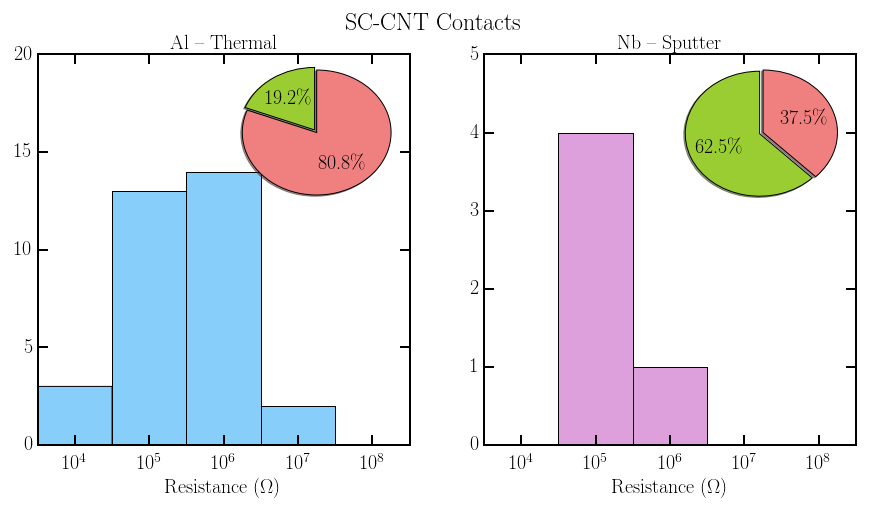

In [698]:
# SC Plots

mat_dict = {'Co':'FM', 'Py':'FM', 'Al':'SC', 'Nb':'SC', 'Au':'NM', 'Pd':'NM'}
materials = ['Al', 'Nb']
colors = ['lightskyblue', 'gold', 'plum']

fig, axs = plt.subplots(1,2, figsize = (22*2./3.,7), sharey=False, sharex=True)
ax = axs.flatten()

title = 'Al -- Thermal'
material = 'Al'
method = 'thermal'
mat_type = mat_dict.get(material)

nf = df[df[mat_type+' Material'].str.contains(material)]
nf = nf[nf[mat_type+' Method'] == method]
R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
if len(R)>0:
    bins = np.array([4, 5, 6, 7, 8])
    labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
    ax[0].hist(np.log10(R), log=False, bins=bins, color=colors[0])
    ax[0].set_xlim(4,9)
    ax[0].set_xticks(bins+0.5)
    ax[0].set_xticklabels(labels)
    ax[0].set_ylim(0,20)
    ax[0].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
    ax[0].set_title(title)

    axin = add_subplot_axes(ax[0],[0.5,0.6,0.5,0.4])
    fracs, labels = pie_data(R)
    total = sum(fracs)
    axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
             colors = ['yellowgreen', 'lightcoral'], 
             autopct=lambda(p): '{:.1f}\%'.format(p))
else:
    ax[i].axis('off')
        
title = 'Nb -- Sputter'
material = 'Nb'
method = 'sputter'
mat_type = mat_dict.get(material)

nf = df[df[mat_type+' Material'].str.contains(material)]
nf = nf[nf[mat_type+' Method'] == method]
R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
i = ind[n]
if len(R)>0:
    bins = np.array([4, 5, 6, 7, 8])
    labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
    ax[1].hist(np.log10(R), log=False, bins=bins, color=colors[2])
    ax[1].set_xlim(4,9)
    ax[1].set_xticks(bins+0.5)
    ax[1].set_xticklabels(labels)
    ax[1].set_ylim(0,5)
    ax[1].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
    ax[1].set_title(title)

    axin = add_subplot_axes(ax[1],[0.5,0.6,0.5,0.4])
    fracs, labels = pie_data(R)
    total = sum(fracs)
    axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
             colors = ['yellowgreen', 'lightcoral'], 
             autopct=lambda(p): '{:.1f}\%'.format(p))
else:
    ax[i].axis('off')
    
fig.suptitle('SC-CNT Contacts', fontsize=24)
fig.savefig(os.path.join(fig_dir, 'sc_cnt_contacts.png'), dpi=300)

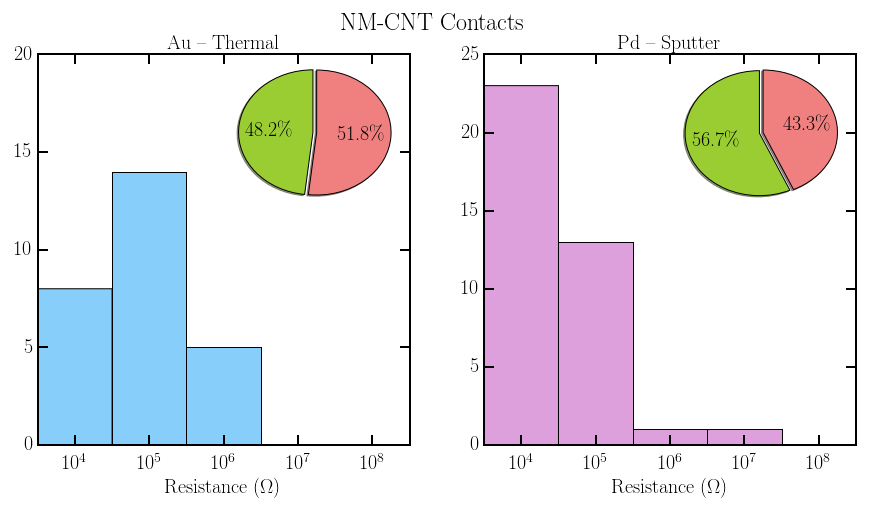

In [699]:
# NM Plots

mat_dict = {'Co':'FM', 'Py':'FM', 'Al':'SC', 'Nb':'SC', 'Au':'NM', 'Pd':'NM'}
materials = ['Al', 'Nb']
colors = ['lightskyblue', 'gold', 'plum']

fig, axs = plt.subplots(1,2, figsize = (22*2./3.,7), sharey=False, sharex=True)
ax = axs.flatten()

title = 'Au -- Thermal'
material = 'Au'
method = 'thermal'
mat_type = mat_dict.get(material)

nf = df[df[mat_type+' Material'].str.contains(material)]
nf = nf[nf[mat_type+' Method'] == method]
R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
if len(R)>0:
    bins = np.array([4, 5, 6, 7, 8])
    labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
    ax[0].hist(np.log10(R), log=False, bins=bins, color=colors[0])
    ax[0].set_xlim(4,9)
    ax[0].set_xticks(bins+0.5)
    ax[0].set_xticklabels(labels)
    ax[0].set_ylim(0,20)
    ax[0].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
    ax[0].set_title(title)

    axin = add_subplot_axes(ax[0],[0.5,0.6,0.5,0.4])
    fracs, labels = pie_data(R)
    total = sum(fracs)
    axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
             colors = ['yellowgreen', 'lightcoral'], 
             autopct=lambda(p): '{:.1f}\%'.format(p))
else:
    ax[i].axis('off')
        
title = 'Pd -- Sputter'
material = 'Pd'
method = 'sputter'
mat_type = mat_dict.get(material)

nf = df[df[mat_type+' Material'].str.contains(material)]
nf = nf[nf[mat_type+' Method'] == method]
R = np.fromiter(yield_resistances(nf[mat_type+'-CNT']), dtype=np.float)
i = ind[n]
if len(R)>0:
    bins = np.array([4, 5, 6, 7, 8])
    labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
    ax[1].hist(np.log10(R), log=False, bins=bins, color=colors[2])
    ax[1].set_xlim(4,9)
    ax[1].set_xticks(bins+0.5)
    ax[1].set_xticklabels(labels)
    ax[1].set_ylim(0,25)
    ax[1].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
    ax[1].set_title(title)

    axin = add_subplot_axes(ax[1],[0.5,0.6,0.5,0.4])
    fracs, labels = pie_data(R)
    total = sum(fracs)
    axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
             colors = ['yellowgreen', 'lightcoral'], 
             autopct=lambda(p): '{:.1f}\%'.format(p))
else:
    ax[i].axis('off')
    
fig.suptitle('NM-CNT Contacts', fontsize=24)
fig.savefig(os.path.join(fig_dir, 'nm_cnt_contacts.png'), dpi=300)

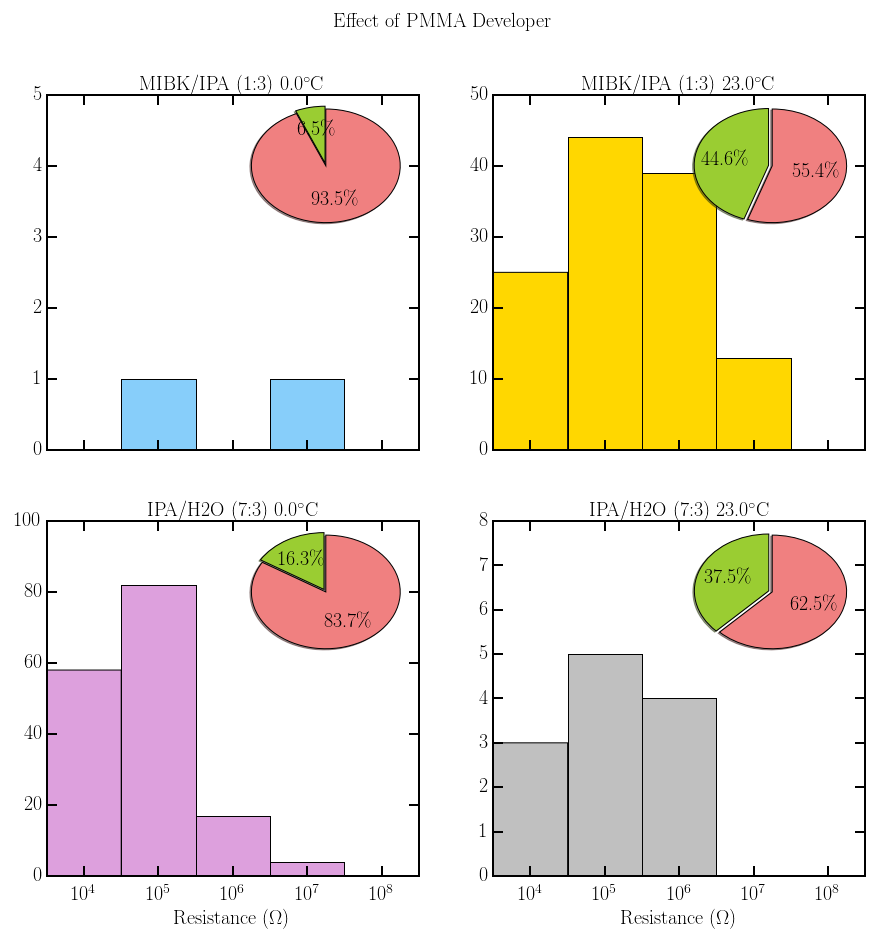

In [704]:
developers = ['MIBK', 'H2O']
developer_dict = {'MIBK':'MIBK/IPA (1:3)', 'H2O':'IPA/H2O (7:3)'}
temps = [0.0, 23.0]
rtypes = ['FM-CNT', 'SC-CNT', 'SC-CNT-FM', 'NM-CNT']
colors = ['lightskyblue', 'gold', 'plum', 'silver']

fig, axs = plt.subplots(2,2, sharex=True, figsize = (22*2./3.,14))
ax = axs.flatten()

i = 0
for d in developers:
    for t in temps:
        lf = df[df['Developer'].str.contains(d)]
        lf = lf[lf['Developer Temp (C)'] == t]

        R = []
        for rt in rtypes:
            R.append(np.fromiter(yield_resistances(lf[rt]), dtype=np.float))
        R = np.concatenate(R)
        
        bins = np.array([4, 5, 6, 7, 8])
        labels = [r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$', r'$10^8$', '']
        ax[i].hist(np.log10(R), log=False, bins=bins, color=colors[i])
        ax[i].set_xlim(4,9)
        ax[i].set_xticks(bins+0.5)
        ax[i].set_xticklabels(labels)
        # ax[i].set_ylim(0,5)
        # ax[i].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
        ax[i].set_title('{0} {1}'.format(developer_dict.get(d), t)+'$^{\circ}$C')
        ax[i].set_title('{0} {1}$^{{\circ}}$C'.format(developer_dict.get(d), t))
        
        axin = add_subplot_axes(ax[i],[0.5,0.6,0.5,0.4])
        fracs, labels = pie_data(R)
        total = sum(fracs)
        axin.pie(fracs, shadow=True, startangle=90, explode=explode, 
                 colors = ['yellowgreen', 'lightcoral'], 
                 autopct=lambda(p): '{:.1f}\%'.format(p))
        i+=1
ax[0].set_ylim(0,5)
ax[1].set_ylim(0,50)
ax[2].set_ylim(0,100)
ax[3].set_ylim(0,8)
ax[2].set_xlabel('Resistance ($\Omega$)', fontsize = 20)
ax[3].set_xlabel('Resistance ($\Omega$)', fontsize = 20)

fig.suptitle('Effect of PMMA Developer')
fig.savefig(os.path.join(fig_dir, 'developer_tests.png'), dpi=300)